## **Name: Nadav Banay,  Id: 326277910**
  
## **Name: Noa Tobias,   Id: 326335064**

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score



from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
np.random.seed(2)

In [195]:
df_train = pd.read_parquet("content/train.parquet").copy()
df_test = pd.read_parquet("content/test.parquet").copy()
df_train

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
199,-1,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,50,13,-1,Unknown,2,10.5000,"London, England / Marietta, Ohio and Milwaukee...","Ridsdale, Miss. Lucy",0,1,1,0,1,W./C. 14258
283,4,2,-1,Unknown,2,22.0250,Unknown,"Kink-Heilmann, Miss. Luise Gretchen",2,2,1,0,1,315153
797,32,Unknown,-1,Unknown,2,10.5000,"St Ives, Cornwall / Houghton, MI","Jenkin, Mr. Stephen Curnow",0,1,0,0,0,C.A. 33111
1300,21,Unknown,-1,Unknown,2,11.5000,"Penzance, Cornwall / Akron, OH","Cotterill, Mr. Henry 'Harry'",0,1,0,0,0,29107


In [73]:
df_test

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
670,64,Unknown,263,Unknown,2,26.000000,"Isle of Wight, England","Nicholson, Mr. Arthur Ernest",0,0,0,0,0,693
251,48,14,-1,Unknown,2,36.750000,"St Ives, Cornwall / Hancock, MI","Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",2,1,1,0,1,C.A. 33112
1225,35,Unknown,-1,Unknown,1,12.350000,Unknown,"Keane, Mr. Daniel",0,1,0,0,0,233734
300,19,Unknown,-1,C23 C25 C27,2,263.000000,"Winnipeg, MB","Fortune, Mr. Charles Alexander",2,0,0,3,0,19950
352,4,15,-1,Unknown,2,11.133300,Unknown,"Johnson, Master. Harold Theodor",1,2,0,1,1,347742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,22,Unknown,47,Unknown,2,8.050000,Unknown,"Gilinski, Mr. Eliezer",0,2,0,0,0,14973
1068,59,D,-1,C101,2,51.479198,"Belmont, MA","Brown, Mrs. John Murray (Caroline Lane Lamson)",0,0,1,2,1,11769
669,50,6,-1,B58 B60,0,247.520798,"Montreal, PQ","Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,0,1,0,1,PC 17558
621,21,Unknown,-1,Unknown,2,7.800000,Unknown,"Nosworthy, Mr. Richard Cater",0,2,0,0,0,A/4. 39886


# Brief overview of the Data:

Text(0.5, 0, '0 = Died, 1 = Survived')

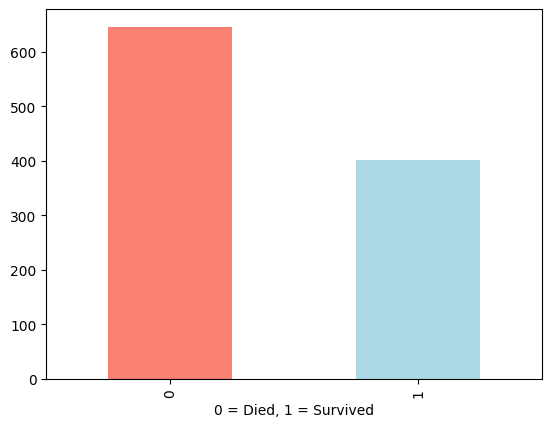

In [74]:
df_train["survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xlabel("0 = Died, 1 = Survived")

In [97]:
# ALL DATA IS HERE, THERE'S NO NULL VALUES
print(f'TRAIN:\n {df_train.isnull().sum()}')
print(f'TEST:\n {df_test.isnull().sum()}')

TRAIN:
 age         0
cabin       0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
survived    0
dtype: int64
TEST:
 age         0
cabin       0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
survived    0
dtype: int64


In [77]:
df_train.describe()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,23.640879,13.319962,1.512894,31.651489,0.366762,1.303725,0.353391,0.511939,0.382999
std,17.842871,54.048716,0.806034,47.499115,0.814052,0.832775,0.478251,1.071801,0.486350
min,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,-1.000000,1.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000
50%,24.000000,-1.000000,2.000000,14.400000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,-1.000000,2.000000,30.500000,0.000000,2.000000,1.000000,1.000000,1.000000
max,80.000000,328.000000,3.000000,512.329224,9.000000,2.000000,1.000000,8.000000,1.000000


(Text(0.5, 1.0, 'Survived Frequency for Sex'),
 Text(0.5, 0, '0 = Died, 1 = Survived'),
 Text(0, 0.5, 'Amount'),
 (array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')]))

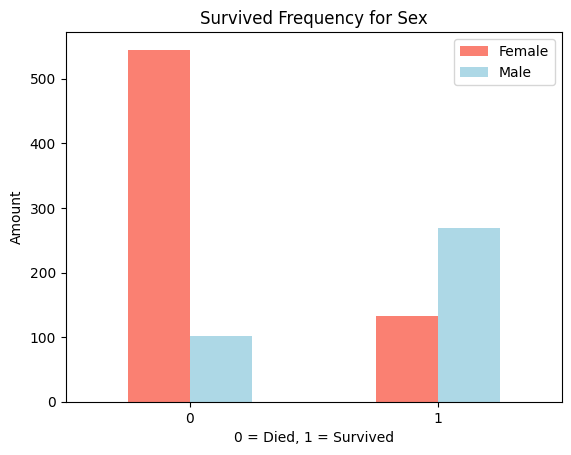

In [105]:
# Create a plot of crosstab
pd.crosstab(df_train.survived,df_train.sex).plot(kind="bar",color=["salmon","lightblue"])
plt.title("Survived Frequency for Sex"), plt.xlabel("0 = Died, 1 = Survived"), plt.ylabel("Amount"), plt.legend(["Female", "Male"]), plt.xticks(rotation=0)

### THIS WILL BECOME A HYPOTHESIS WHICH WILL REVEAL TO BE TRUE IN THE PROCCESS ###

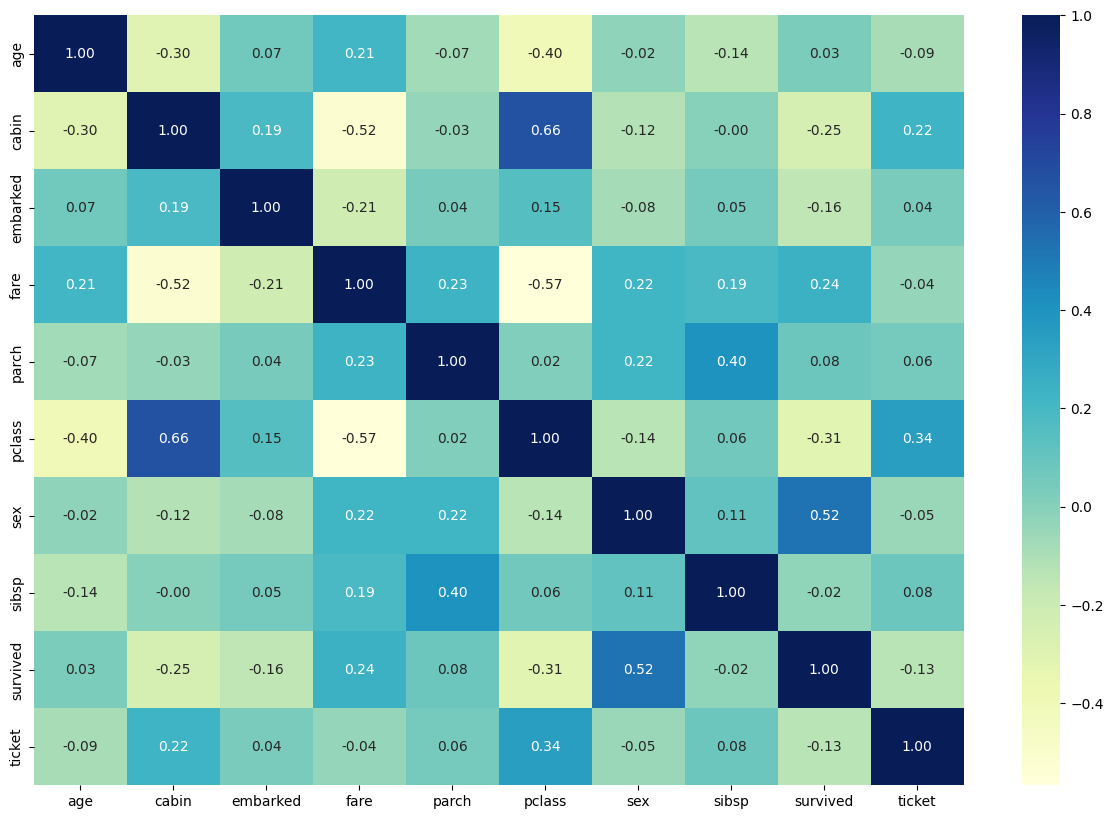

In [205]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_train.corr()
fix, ax = plt.subplots(figsize= (15,10))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="YlGnBu");

# Editing the data:

## deleting features:

In [196]:
df_train = df_train.drop(labels=["name", "home.dest", "boat", "body"], axis=1)
df_test = df_test.drop(labels=["name", "home.dest", "boat", "body"], axis=1)

* 'boat' and 'body', are determined after the person is dead/alive therefore they won't help us create a strong model and predict new data (it obviously seems kinda problematic to determine if somone will survive or not based on his dead body number)
* 'home.dest' and 'name' are non categorial string based lables that we never learned how to work with, moreover the value they could contribute seems minor anyway

## converting categorial to numeric: 

In [197]:
for label, content in df_train.items():
  if pd.api.types.is_string_dtype(content):
    df_train[label] = content.astype("category").cat.as_ordered()

for label, content in df_test.items():
  if pd.api.types.is_string_dtype(content):
    df_test[label] = content.astype("category").cat.as_ordered()

In [198]:
# Turn categorical variables into numbers 
for label, content in df_train.items():
  if not pd.api.types.is_numeric_dtype(content):
    #Turn categories into numbers and add +1
    df_train[label] = pd.Categorical(content).codes + 1
    
for label, content in df_test.items():
  if not pd.api.types.is_numeric_dtype(content):
    #Turn categories into numbers and add +1
    df_test[label] = pd.Categorical(content).codes + 1

# Creating the models:

In [199]:
x_train, x_test = df_train.drop(labels=['survived'], axis=1), df_test.drop(labels=['survived'], axis=1)
y_train, y_test = df_train['survived'], df_test['survived']

In [200]:
model_grid = {'n_estimators': [int(i) for i in np.linspace(10,100,12)],"max_features":['auto','sqrt'] , "max_depth":[2,4], "min_samples_split":[2,5] , "min_samples_leaf":[1,2] , "bootstrap":[True, False] }
cvsearch = GridSearchCV(RandomForestClassifier(), param_grid=model_grid)
cvsearch.fit(x_train, y_train)
forest_tree = cvsearch.best_estimator_

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

In [204]:
# Different hyperparameters to make the best of the models
model_grid = {'n_estimators': [int(i) for i in np.linspace(80,120,12)],"max_depth": [5, 7, 3], "learning_rate": [0.05, 0.1, 0.01,0.5]}
cvsearch = GridSearchCV(XGBClassifier(), param_grid=model_grid)
cvsearch = GridSearchCV(XGBClassifier(), param_grid=model_grid)
cvsearch.fit(x_train, y_train)
xgb = cvsearch.best_estimator_

In [202]:
svc = CalibratedClassifierCV(LinearSVC(fit_intercept = True)).fit(x_train, y_train)

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

In [203]:
logisti = LogisticRegression().fit(x_train, y_train)

C:\Users\nadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
models = {"Logistic Regression": logisti, "SVC": svc, "Random Forest": forest_tree, "XGB": xgb}

In [207]:
def score_models(x_test,y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of differetn Scikit-Learn machine learning models
  X_test : testing data 
  y_test : testing data
  """


  # Make a dictionary to keep model scores
  model_scores = {}

  #Loop through models
  for name, model in models.items():
    # Evaluate the model and append its score to model_scores
    y_pred = model.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')

    model_scores[name] = model.score(x_test, y_test), precision, recall, fscore
  return model_scores

In [208]:
model_scores = score_models(x_test,y_test)

model_scores

{'Logistic Regression': (0.7938931297709924,
  0.7806069487696159,
  0.7847803185226498,
  0.7824857019863478),
 'SVC': (0.7900763358778626,
  0.7813160676532769,
  0.7638656503687178,
  0.770230407398549),
 'Random Forest': (0.8015267175572519,
  0.7886968821105713,
  0.7909152878478032,
  0.7897530864197531),
 'XGB': (0.7709923664122137,
  0.7591019777870167,
  0.7703414513230464,
  0.7623367198838897)}

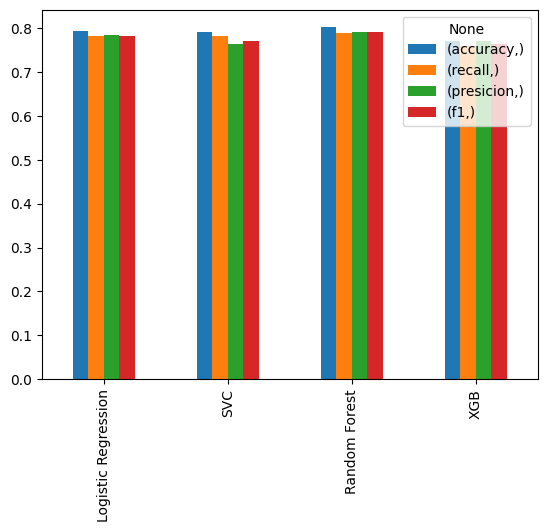

In [209]:
model_compare = pd.DataFrame(model_scores, index=[["accuracy", "recall", "presicion", "f1"]])
model_compare.T.plot.bar();

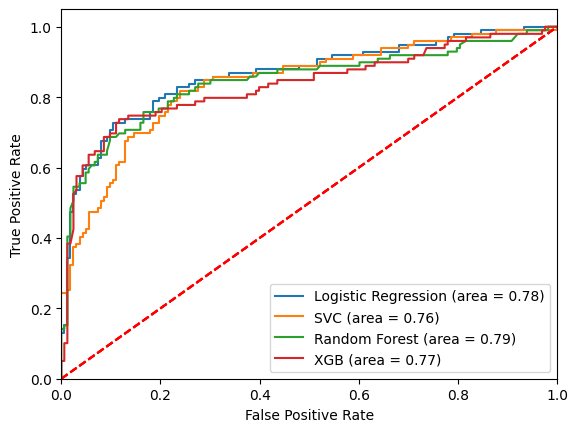

In [210]:
def plot_roc():
    for name, model in models.items():
        logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

        plt.plot(fpr, tpr, label='%s (area = %0.2f)'%(name, logit_roc_auc)), plt.plot([0, 1], [0, 1],'r--'), plt.savefig('Log_ROC'), plt.xlim([0.0, 1.0]), plt.ylim([0.0, 1.05]), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.legend(loc="lower right")
    plt.show()

plot_roc()

as we can see random forest presents the highet - accuracy, recall, precision and f1 scores. moreover it has the highest AUC of the ROC, therefore we chose our final model to be the **random forest model**

In [220]:
end_model = models["Random Forest"]

## short review and conclusions about the final model: 

In [237]:
y_pred = end_model.predict(x_test)

In [248]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       163
           1       0.73      0.75      0.74        99

    accuracy                           0.80       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.80      0.80      0.80       262



In [230]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

[[136  27]
 [ 25  74]]


In [245]:
all = 262
tp= 136
tn = 74
accuracy = (tp + tn) / all

In [246]:
accuracy

0.8015267175572519

In [242]:
alive_but_machine_said_dead = 27/(136+27)
alive_but_machine_said_dead

0.1656441717791411

if the person won't survive there's about a 15% chance the model will predict its alive

In [243]:
dead_but_machine_said_alive = 25 / (25+74)
dead_but_machine_said_alive

0.25252525252525254

If the person wont survive, the model will 25% say it would survive

We can understand that our machine will work very well for cases that the person needs to die but it will work good but not well for cases that the person needs to live

# final overview about the importance of the features:

by inspecting the importance of our chosen features we can delete those who are irrelevant and keeping + looking at combinations of those who been helpful, this also helped us choose the "initial" features in the excercise. much like the gradient decent we start with a guess analyze what we've done and shift to the right direction.

In [254]:
# Match coef's of features to columns
feature_dict = dict(zip(df_tmp.columns, list(end_model.feature_importances_)))
feature_dict


{'age': 0.051024152331924526,
 'cabin': 0.07671422790362409,
 'embarked': 0.013289821049428304,
 'fare': 0.1369281675273255,
 'parch': 0.031170508596039946,
 'pclass': 0.12990542767058616,
 'sex': 0.4730971793278162,
 'sibsp': 0.016676122887316843,
 'survived': 0.07119439270593844}

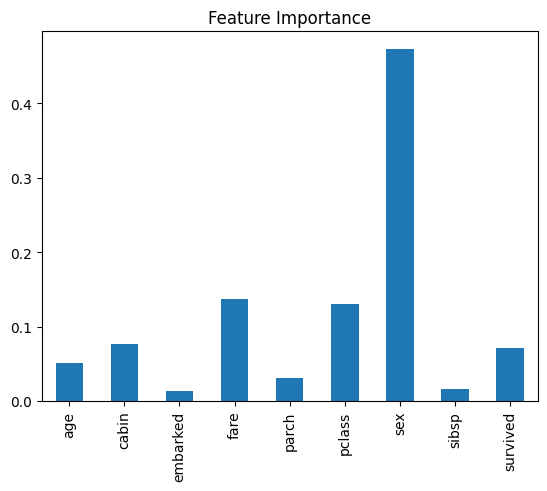

In [255]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend=False);  